<a href="https://colab.research.google.com/github/LoQiseaking69/Algo_Note_Books/blob/main/DEMO/NFV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Newton Fractal Visualization

**Overview:**  
This Jupyter Notebook introduces a Python script designed for the intricate generation of Newton fractals. These fractals are complex, visually striking patterns that represent the solution sets of polynomial equations in the complex plane.

**Key Features:**
- **Dynamic Fractal Generation:** Utilizes Newton's method to iteratively approximate polynomial roots, creating unique fractal patterns with each execution.
- **Randomized Elements:** Both polynomial coefficients and the central complex number are randomly chosen, ensuring a diverse and engaging fractal experience each time.
- **Colorful Visualizations:** A selection of color maps adds vibrancy and depth, enhancing the overall aesthetic appeal of the fractals.
- **Polynomial Influence:** The script includes plots of the polynomial and its derivative, offering insights into their roles in shaping the fractal structure.
- **Interactive & Static Display Compatibility:** Features an interactive button for live fractal generation and an automatic display for static viewing environments like GitHub.

**Purpose and Exploration:**
This notebook serves as a creative blend of art and science. It showcases Newton fractals not just as mathematical curiosities but as captivating visual explorations of polynomial functions in the complex plane. Each fractal reveals unique patterns and symmetries, offering a visually informative perspective into the fascinating world of complex mathematics.

---

## Script Explanation

- The script is designed to generate a Newton fractal, a complex and visually striking representation of the solution set of a polynomial equation in the complex plane.
- A Newton fractal is created by applying Newton's method for finding successively better approximations to the roots (or zeroes) of a real-valued function.
- The script defines functions for:
    - Analyzing complex numbers to extract their real and imaginary parts, magnitude, and argument.
    - Generating the Newton fractal based on a given polynomial and its derivative, within specified coordinate limits.
    - Plotting both the polynomial and its derivative to visualize their real and imaginary components.
- The generation of the Newton fractal is randomized in several aspects:
    - Polynomial coefficients are randomly selected, creating a unique fractal for each execution.
    - The complex number around which the fractal is centered is also randomly chosen.
    - The color map used for visualizing the fractal is selected randomly from a predefined set, adding variety to the visual output.
- The fractal's generation involves iterating over a grid of complex numbers, applying Newton's method, and coloring each point based on the number of iterations required to approximate a root.
- The script measures and displays the time taken to generate the fractal, providing insight into the computational complexity.
- An interactive component is included via a button widget, allowing users to generate new fractals on demand when the script is run in an interactive environment like a Jupyter Notebook.
- For static displays, such as when the notebook is uploaded to GitHub, the script automatically generates a sample fractal, ensuring that the output is visible even in non-interactive renderings.

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy as sp
import time
from ipywidgets import Button, Output
from IPython.display import display

## WIDGET with**
**Default preview*

Output()

Button(description='Generate Newton Fractal', style=ButtonStyle())

Initial Complex Number Analysis: {'real_part': -0.662806452963062, 'imaginary_part': 1.3544934503602373, 'magnitude': 1.5079671419358767, 'argument': 2.025878808825495}


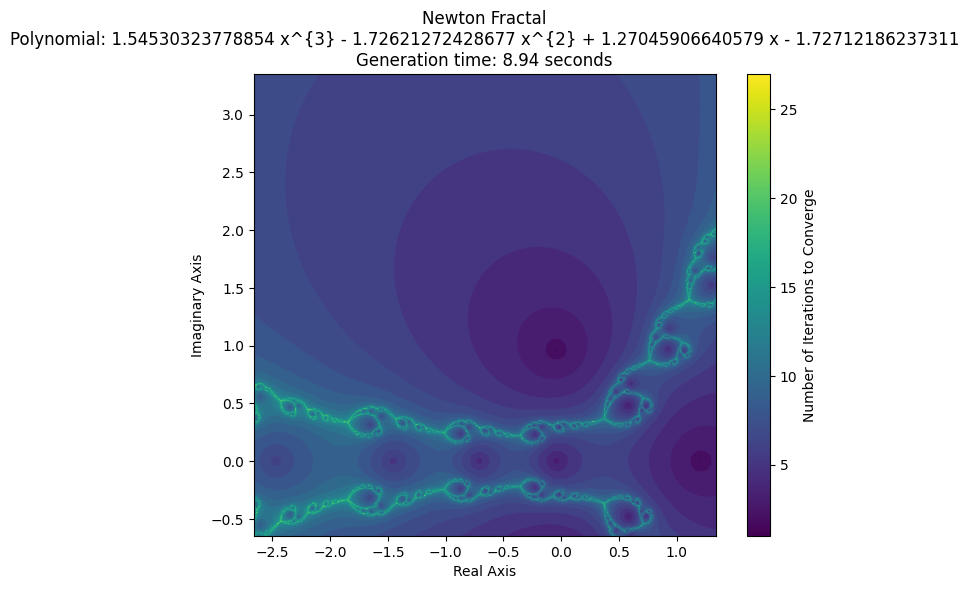

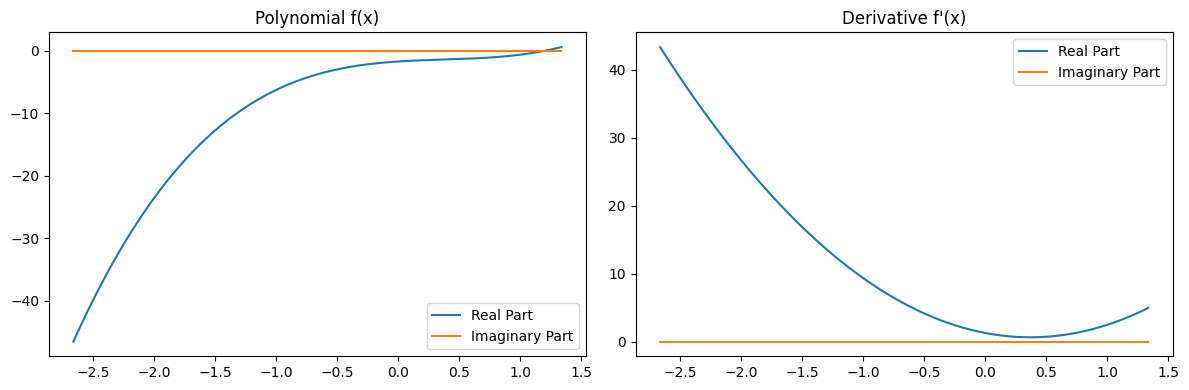

In [ ]:
output = Output()

def analyze_complex_number(c):
    analysis = {
        'real_part': c.real,
        'imaginary_part': c.imag,
        'magnitude': abs(c),
        'argument': np.angle(c)
    }
    return analysis

def newton_fractal(f, df, width, height, xlim, ylim, max_iter=20, tol=1e-6):
    x = np.linspace(xlim[0], xlim[1], width)
    y = np.linspace(ylim[0], ylim[1], height)
    fractal = np.zeros((height, width))

    for i in range(width):
        for j in range(height):
            z = x[i] + 1j*y[j]
            for k in range(max_iter):
                dz = f(z) / df(z)
                if abs(dz) < tol:
                    break
                z -= dz
            fractal[j, i] = k

    return fractal

def plot_polynomial_and_derivative(f, df, xlim, ylim):
    x = np.linspace(xlim[0], xlim[1], 400)
    y_f = [f(val) for val in x]
    y_df = [df(val) for val in x]

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, np.real(y_f), label='Real Part')
    plt.plot(x, np.imag(y_f), label='Imaginary Part')
    plt.title("Polynomial f(x)")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, np.real(y_df), label='Real Part')
    plt.plot(x, np.imag(y_df), label='Imaginary Part')
    plt.title("Derivative f'(x)")
    plt.legend()

    plt.tight_layout()
    plt.show()

def generate_newton_fractal_image(c, width, height):
    x = sp.symbols('x')
    coeffs = [random.uniform(-2, 2) for _ in range(4)]
    f = sum(c * x**i for i, c in enumerate(coeffs[::-1]))
    df = sp.diff(f, x)

    f_lambdified = sp.lambdify(x, f, 'numpy')
    df_lambdified = sp.lambdify(x, df, 'numpy')

    xlim = (c.real - 2, c.real + 2)
    ylim = (c.imag - 2, c.imag + 2)
    max_iter = random.randint(10, 30)
    tol = random.uniform(1e-6, 1e-4)

    start_time = time.time()
    newton_set = newton_fractal(f_lambdified, df_lambdified, width, height, xlim, ylim, max_iter, tol)
    end_time = time.time()

    colormap = random.choice(['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

    plt.figure(figsize=(8, 6))
    img = plt.imshow(newton_set, extent=[*xlim, *ylim], cmap=colormap, origin='lower')
    plt.colorbar(img, label='Number of Iterations to Converge')
    plt.title(f"Newton Fractal\nPolynomial: {sp.latex(f)}\nGeneration time: {end_time - start_time:.2f} seconds")
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.grid(False)
    plt.axis('on')
    plt.show()

    plot_polynomial_and_derivative(f_lambdified, df_lambdified, xlim, ylim)

def on_button_clicked(b):
    with output:
        output.clear_output(wait=True)
        real_part = random.uniform(-2, 2)
        imaginary_part = random.uniform(-2, 2)
        complex_number = complex(real_part, imaginary_part)
        analysis = analyze_complex_number(complex_number)
        print("Complex Number Analysis:", analysis)
        generate_newton_fractal_image(complex_number, 800, 600)

button = Button(description="Generate Newton Fractal")
button.on_click(on_button_clicked)

display(output)
display(button)

# Generate an initial sample fractal for GitHub display
real_part = random.uniform(-2, 2)
imaginary_part = random.uniform(-2, 2)
complex_number = complex(real_part, imaginary_part)
analysis = analyze_complex_number(complex_number)
print("Initial Complex Number Analysis:", analysis)
generate_newton_fractal_image(complex_number, 800, 600)